In [44]:
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

dataset = pd.read_csv("./crypto-markets.csv")

In [45]:
dataset.info()

# slug : nome della cryptocurrency
# symbol : simbolo della cryptocurrency
# name : nome della cryptocurrency
# date: data dell'osservazione
# ranknow : rank della cryptocurrency in quella data
# open : prezzo di apertura in quella data
# high : prezzo più alto in quella data
# low : prezzo più basso in quella data
# close : prezzo di chiusura in quella data
# volume: volume delle transazioni in quella data
# market : capitalizzazione di mercato in USD
# close_ratio: (close-low)/(high-low)
# spread : differenza tra il prezzo più alto e quello più basso in quella data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702166 entries, 0 to 702165
Data columns (total 13 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   slug         702166 non-null  object 
 1   symbol       702166 non-null  object 
 2   name         702166 non-null  object 
 3   date         702166 non-null  object 
 4   ranknow      702166 non-null  int64  
 5   open         702166 non-null  float64
 6   high         702166 non-null  float64
 7   low          702166 non-null  float64
 8   close        702166 non-null  float64
 9   volume       702166 non-null  int64  
 10  market       702166 non-null  int64  
 11  close_ratio  702166 non-null  float64
 12  spread       702166 non-null  float64
dtypes: float64(6), int64(3), object(4)
memory usage: 69.6+ MB


Costruiamo un dataset ridotto contenente:
- Solo transazioni di bitcoin effettuate nel 2017

In [46]:
reduced_dataset = dataset[(dataset["slug"] == "bitcoin") & (2017 == pd.DatetimeIndex(dataset["date"]).year)]
print(reduced_dataset)

         slug symbol     name        date  ranknow      open      high  \
1344  bitcoin    BTC  Bitcoin  2017-01-01        1    963.66   1003.08   
1345  bitcoin    BTC  Bitcoin  2017-01-02        1    998.62   1031.39   
1346  bitcoin    BTC  Bitcoin  2017-01-03        1   1021.60   1044.08   
1347  bitcoin    BTC  Bitcoin  2017-01-04        1   1044.40   1159.42   
1348  bitcoin    BTC  Bitcoin  2017-01-05        1   1156.73   1191.10   
...       ...    ...      ...         ...      ...       ...       ...   
1704  bitcoin    BTC  Bitcoin  2017-12-27        1  16163.50  16930.90   
1705  bitcoin    BTC  Bitcoin  2017-12-28        1  15864.10  15888.40   
1706  bitcoin    BTC  Bitcoin  2017-12-29        1  14695.80  15279.00   
1707  bitcoin    BTC  Bitcoin  2017-12-30        1  14681.90  14681.90   
1708  bitcoin    BTC  Bitcoin  2017-12-31        1  12897.70  14377.40   

           low     close       volume        market  close_ratio   spread  
1344    958.70    998.33    1477750

Plottiamo il dataframe ridotto

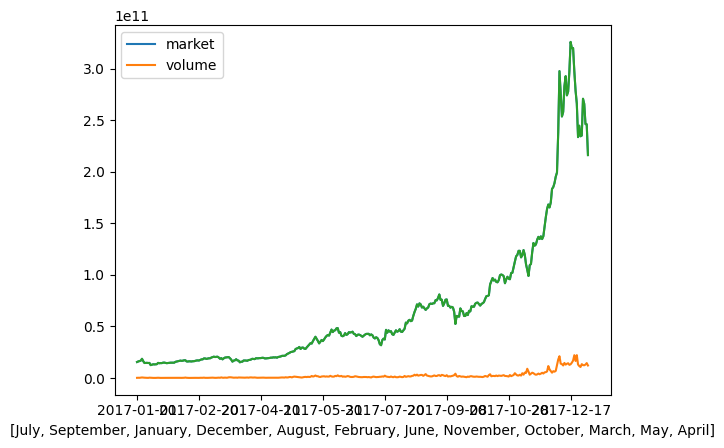

In [58]:
reduced_dataset.plot(x="date", y=["market","volume"])
plt.plot(reduced_dataset["date"], reduced_dataset["market"])
plt.show()

Si vuole descrivere con un pie-chart il valore di mercato delle prime 5 cryptovalute

Text(0.5, 1.0, 'Volume transazioni delle prime 5 cryptocurrencies')

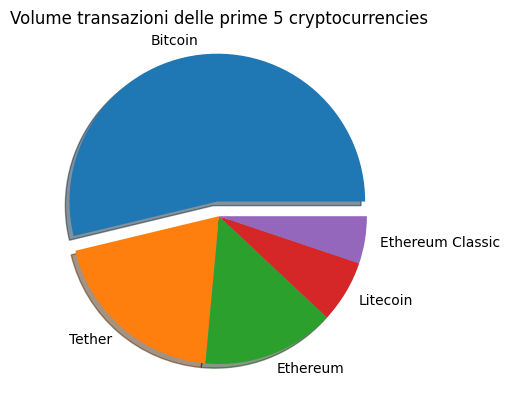

In [80]:
top_five_crypto_name = dataset.groupby("name")["volume"].last().sort_values(ascending=False).head(5).index
top_five_crypto_volume = dataset.groupby("name")["volume"].last().sort_values(ascending=False).head(5).values

explode = (.1, 0, 0, 0, 0)
plt.pie(top_five_crypto_volume, explode=explode, labels=top_five_crypto_name, shadow=True)
plt.title('Volume transazioni delle prime 5 cryptocurrencies')